In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
columns = ['name','sex','births']
names1880 = pd.read_csv("E:\\names\\yob1880.txt",names=columns)
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [4]:
names1880.groupby('sex')['name'].count()

sex
F     942
M    1058
Name: name, dtype: int64

In [5]:
names1880.groupby('sex')['name'].nunique()

sex
F     942
M    1058
Name: name, dtype: int64

In [6]:
names1880.groupby('sex')['births'].sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [7]:
names1880.pivot_table(index = 'sex',values='births',aggfunc='sum')

,births
sex,
F,90994
M,110490


In [8]:
year = 2000
path = "E:\\names\\yob%d.txt"%year
path

'E:\\names\\yob2000.txt'

In [9]:
years = range(1880,2019)
df_res = []
for year in years:
    path = "E:\\names\\yob%d.txt"%year
    df = pd.read_csv(path,names=columns)
    df['year'] = year
    df_res.append(df)
names = pd.concat(df_res,ignore_index=True)
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [10]:
names_pt = names.pivot_table(index='year',columns='sex',aggfunc='sum')
names_pt.head(3)

births        
sex        F       M
year                
1880   90994  110490
1881   91953  100743
1882  107847  113686

In [ ]:
names_pt.plot();

,year,sex,births
0,1880,F,90994
1,1880,M,110490
2,1881,F,91953


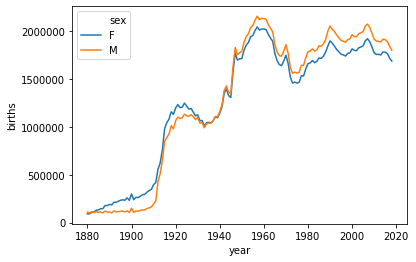

In [11]:
sns_pt = names_pt.stack().reset_index()
sns.lineplot(x='year',y='births',hue='sex',data=sns_pt);
sns_pt.head(3)

In [12]:
names_pt.head()
sns_pt = names_pt.stack().reset_index()

In [13]:
def add_pct(group):
    group['pct'] = group.births/group.births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_pct)
names.head(3)

,name,sex,births,year,pct
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012


In [14]:
names.groupby(['year','sex']).pct.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
1885  F      1.0
      M      1.0
1886  F      1.0
      M      1.0
1887  F      1.0
      M      1.0
1888  F      1.0
      M      1.0
1889  F      1.0
      M      1.0
1890  F      1.0
      M      1.0
1891  F      1.0
      M      1.0
1892  F      1.0
      M      1.0
1893  F      1.0
      M      1.0
1894  F      1.0
      M      1.0
            ... 
2004  F      1.0
      M      1.0
2005  F      1.0
      M      1.0
2006  F      1.0
      M      1.0
2007  F      1.0
      M      1.0
2008  F      1.0
      M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
2011  F      1.0
      M      1.0
2012  F      1.0
      M      1.0
2013  F      1.0
      M      1.0
2014  F      1.0
      M      1.0
2015  F      1.0
      M      1.0
2016  F      1.0
      M      1.0
2017  F      1.0
    

In [20]:
def get_top1000(group):
    return group.sort_values(by = 'births',ascending=False)[:1000]
top1000 = names.groupby(['year','sex']).apply(get_top1000)
top1000.reset_index(inplace=True,drop=True)
top1000.head(3)

,name,sex,births,year,pct
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012


In [23]:
boys=top1000[top1000.sex == 'M']
boysTOP2=boys.groupby('name')['births'].sum().nlargest(2).index
boys.head()

,name,sex,births,year,pct
942,John,M,9655,1880,0.087383
943,William,M,9532,1880,0.086270
944,James,M,5927,1880,0.053643
945,Charles,M,5348,1880,0.048403
946,George,M,5126,1880,0.046393


In [24]:
girls = top1000[top1000.sex=='F']
girlsTOP2 = girls.groupby('name')['births'].sum().nlargest(2).index
girlsTOP2

Index(['Mary', 'Elizabeth'], dtype='object', name='name')

In [27]:
boysPT = boys.pivot_table(index='year',columns='name',values = 'births',aggfunc=sum)[boysTOP2]

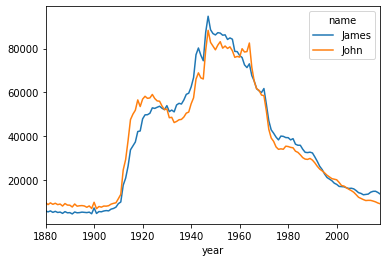

In [29]:
boysPT.plot();

In [46]:
top1000.groupby(['sex','name'])['births'].sum()\
    .groupby(level=0,group_keys=False).nlargest(2).unstack(0)

sex,F,M
name,,
Elizabeth,1638349.0,NaN
James,NaN,5164280.0
John,NaN,5124817.0
Mary,4125675.0,NaN


In [50]:
table1000_pv = top1000.pivot_table(index='year',columns='sex',values='pct',aggfunc='sum')

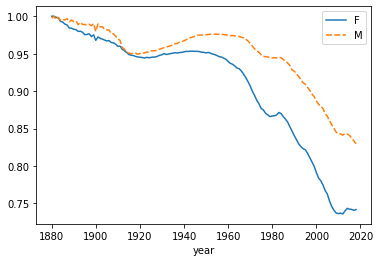

In [53]:
sns.lineplot(data=table1000_pv);

In [72]:
df=boys[boys['year']==2010]
df_sum=df.sort_values(by='pct',ascending=False).pct.cumsum()
k = df_sum.values.searchsorted(0.5) + 1
df_sum.iloc[:k]

260877    0.011546
260878    0.020939
260879    0.029992
260880    0.038956
260881    0.047853
260882    0.056596
260883    0.065180
260884    0.073447
260885    0.081554
260886    0.089638
260887    0.097696
260888    0.105442
260889    0.112893
260890    0.120327
260891    0.127736
260892    0.135111
260893    0.142428
260894    0.149680
260895    0.156924
260896    0.164141
260897    0.170860
260898    0.177346
260899    0.183592
260900    0.189834
260901    0.196000
260902    0.202030
260903    0.207965
260904    0.213770
260905    0.219560
260906    0.225262
            ...   
260964    0.442525
260965    0.444918
260966    0.447311
260967    0.449668
260968    0.451991
260969    0.454304
260970    0.456550
260971    0.458740
260972    0.460926
260973    0.462978
260974    0.464986
260975    0.466989
260976    0.468957
260977    0.470921
260978    0.472873
260979    0.474809
260980    0.476734
260981    0.478634
260982    0.480508
260983    0.482372
260984    0.484232
260985    0.

In [78]:
def get50(group, q = 0.5):
    group = group.sort_values(by='pct',ascending=False).pct.cumsum()
    return group.values.searchsorted(0.5) + 1
table_50 = top1000.groupby(['year','sex']).apply(get50).unstack()
table_50

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
1885,40,16
1886,41,16
1887,41,17
1888,42,17


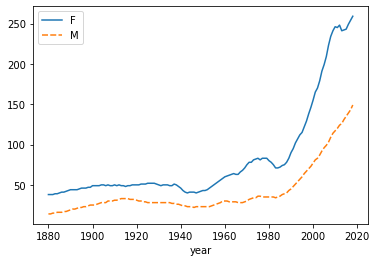

In [80]:
sns.lineplot(data = table_50);

In [107]:
uniquename = pd.Series(top1000.name.unique())
lesl = uniquename[uniquename.str.lower().str.contains('lesl')]
filtr = top1000[top1000['name'].isin(lesl)]
filtr_table=filtr.pivot_table(index='year',columns='sex',values='pct',aggfunc='sum')
filtr_table=filtr_table.div(filtr_table.sum(1),axis=0)

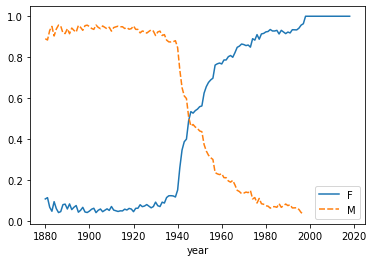

In [110]:
sns.lineplot(data=filtr_table);